<a href="https://colab.research.google.com/github/Patrick-George/Deciphering-neural-networks/blob/master/resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Util Functions

Authors: Arko, Patrick, Chandru, Amit

In [0]:
def plot_history(history):
  import matplotlib.pyplot as plt
  loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
  val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
  acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
  val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]

  if len(loss_list) == 0:
      print('Loss is missing in history')
      exit 

  ## As loss always exists
  epochs = range(1,len(history.history[loss_list[0]]) + 1)

  ## Loss
  plt.figure(1)
  for l in loss_list:
      plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
  for l in val_loss_list:
      plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))

  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  ## Accuracy
  plt.figure(2)
  for l in acc_list:
      plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
  for l in val_acc_list:    
      plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

data

In [0]:
import tensorflow as tf
import numpy as np
numpoints=18000
scale=0.1/5  #Try multi-modal Gaussian!!
x_traink_90 = scale*np.random.randn(numpoints,28,28)
#for a in np.nditer(x_traink_90, op_flags=['readwrite']):
#    if ( a <= 0.5):
#        a[...] = 1
#    else :
#        a[...] = 0

x_testk_90 = np.random.randn(numpoints/10,28,28)
#for a in np.nditer(x_testk_90, op_flags=['readwrite']):
#    if ( a <= 0.5):
#        a[...] = 1
#    else :
#        a[...] = 0


y_traink_90 = np.random.rand(numpoints)
y_traink_90 = np.floor(y_traink_90 * 10)

y_testk_90 = np.random.rand(numpoints/10)
y_testk_90 = np.floor(y_testk_90 * 10)

resnet definition

In [0]:
def residualBlock(x, width):
    y = Dense(width,kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None))(x)
    t = Add()([x, y])
    z = Activation('relu')(t)
    
    return z
  

In [0]:
def residualBlock(x, width):
    y = Dense(width,kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=None))(x)
    y1= Activation('relu')(y)
    y2= Dense(width,kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.0001, seed=None))(y1)
    y3= Activation('relu')(y2)
    z = Add()([x, y3])
    #z = Activation('relu')(t)
    
    return z
  


Synthetic data: It looks like Resnet is better for deep architectures. However, given Resnet architecture it seems shallow networks are better than deep. Now the question that has to be answered is whether Ben Reckht could have fit with shallow network?

size

(?, 20)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
lambda_3 (Lambda)               (None, 28, 28, 1)    0           input_3[0][0]                    
__________________________________________________________________________________________________
flatten_3 (Flatten)             (None, 784)          0           lambda_3[0][0]                   
__________________________________________________________________________________________________
dense_43 (Dense)                (None, 20)           15700       flatten_3[0][0]                  
_______________________________________________________________________________________________

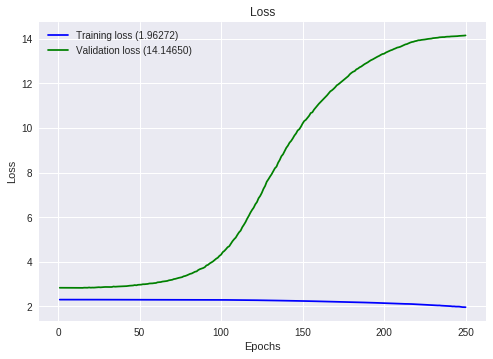

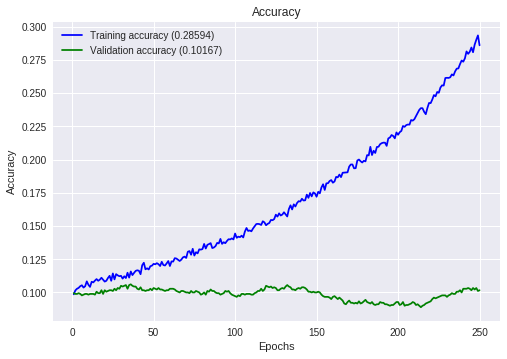

In [0]:
x_train = x_traink_90
x_test = x_testk_90
y_train = y_traink_90
y_test  = y_testk_90
import keras
from keras import *
from keras.callbacks import *
from keras.layers import *
from keras.optimizers import *
from keras.metrics import *
from keras.backend import tf as ktf
from sklearn.model_selection import train_test_split
y_train = utils.to_categorical(y_train, 10).astype(np.uint8)
y_test = utils.to_categorical(y_test, 10).astype(np.uint8)

x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28, 28,1)
import matplotlib.pyplot as plt



numChannel = 20
numClasses = 10
inputs = Input(shape = (28,28,1))
inputs1 = keras.layers.Lambda(lambda image:ktf.image.resize_images(image, 
                                                                   (28, 28)))(inputs)
f1 = Flatten()(inputs1)
conv1 = Dense(numChannel, activation = 'relu')(f1)
conv2 = residualBlock(conv1, numChannel)
conv3 = residualBlock(conv2, numChannel)
conv4 = residualBlock(conv3, numChannel)
conv5 = residualBlock(conv4, numChannel)
conv6 = residualBlock(conv5, numChannel)
conv7 = residualBlock(conv6, numChannel)
conv8 = residualBlock(conv7, numChannel)
conv9 = residualBlock(conv8, numChannel)
conv10 = residualBlock(conv9,numChannel)
conv11 = residualBlock(conv10,numChannel)
conv12 = residualBlock(conv11,numChannel)
conv13 = residualBlock(conv12,numChannel)
conv14 = residualBlock(conv13,numChannel)
conv15 = residualBlock(conv14,numChannel)
conv16 = residualBlock(conv15,numChannel)
conv17 = residualBlock(conv16,numChannel)
conv18 = residualBlock(conv17,numChannel)
conv19 = residualBlock(conv18,numChannel)
conv20 = residualBlock(conv19,numChannel)



print("size\n")
print(conv10.get_shape())
#####
outputs = Dense(10, activation = 'softmax')(conv3)



model2 = Model(inputs = [inputs], outputs = [outputs])

#saving weights

weights = []
p1 = LambdaCallback(on_epoch_end=lambda batch, logs:  weights.append(model2.get_weights() ))
#p2 = LambdaCallback(on_epoch_end=lambda batch, logs:  weights[1].append(model2.layers[2].get_weights() ))
#p3 = LambdaCallback(on_epoch_end=lambda batch, logs:  weights[2].append(model2.layers[3].get_weights() ))


filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='train_acc', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]


model2.summary()
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=False)

model2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model2.fit(x_train, y_train,validation_data = (x_test,y_test),batch_size = 32, epochs =250, callbacks=[p1])
#history = model2.fit(x_train, y_train,validation_data = (x_test,y_test),batch_size = 32, epochs =10, callbacks=callbacks_list)
plot_history(history)

In [0]:
print(len(weights))
print(len(weights[0]))
print(weights[0][6].shape)
model2.set_weights(weights[100])

print(np.linalg.norm(weights[0][1]))

250
8
(20, 10)
0.026057532


In [0]:
a=np.array([])
for i in xrange(0,10):
  for j in range(0,10):
    a=np.append(a,i)
print(a.shape)
b=np.reshape(a,(10,10))
print(b)

(100,)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]
 [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
 [6. 6. 6. 6. 6. 6. 6. 6. 6. 6.]
 [7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]
 [8. 8. 8. 8. 8. 8. 8. 8. 8. 8.]
 [9. 9. 9. 9. 9. 9. 9. 9. 9. 9.]]


In [0]:
from keras import backend as K

inp = model2.input                                           # input placeholder
outputs = [layer.output for layer in model2.layers[1:]]          # all layer outputs
#functor = K.function([inp], outputs )   # evaluation function
functor = [K.function([inp], [out]) for out in outputs] 
print(outputs)
#print(len(outputs))
#print(len(functor))
# Testing
#layer_outs = functor([x_train])
layer_outs = [func([x_train]) for func in functor]
print((layer_outs[8][0].shape))
print(np.linalg.norm(layer_outs[8][0]))

[<tf.Tensor 'lambda_2/Identity:0' shape=(?, 28, 28, 1) dtype=float32>, <tf.Tensor 'flatten_2/Reshape:0' shape=(?, ?) dtype=float32>, <tf.Tensor 'dense_22/Relu:0' shape=(?, 20) dtype=float32>, <tf.Tensor 'dense_23/BiasAdd:0' shape=(?, 20) dtype=float32>, <tf.Tensor 'add_20/add:0' shape=(?, 20) dtype=float32>, <tf.Tensor 'activation_20/Relu:0' shape=(?, 20) dtype=float32>, <tf.Tensor 'dense_24/BiasAdd:0' shape=(?, 20) dtype=float32>, <tf.Tensor 'add_21/add:0' shape=(?, 20) dtype=float32>, <tf.Tensor 'activation_21/Relu:0' shape=(?, 20) dtype=float32>, <tf.Tensor 'dense_42/Softmax:0' shape=(?, 10) dtype=float32>]
(18000, 20)
16.04556


In [0]:
print(outputs[0].name)

lambda_2/Identity:0


In [0]:
Thanks Amit for this part of the code

In [0]:
import re
import matplotlib.pyplot as plt
act=np.array([])
inp = model2.input                                           # input placeholder
outputs = [layer.output for layer in model2.layers[1:]]          # all layer outputs
pattern = re.compile(".*Relu.*")
relu = []
for x in outputs:
  if pattern.match(x.name):
    relu.append(x)    

for i in xrange(9,250,10):
  model2.set_weights(weights[i])
  inp = model2.input                                           # input placeholder
  outputs = [layer.output for layer in model2.layers[1:]]          # all layer outputs
  functor = [K.function([inp], [out]) for out in relu] 
  layer_outs = [func([x_train]) for func in functor]
  for j in xrange(0,len(layer_outs)):
    idx=mlab.find(layer_outs[j][0]>0)
    act=np.append(act,float(len(idx))/layer_outs[j][0].size)

act=np.reshape(act,(len(layer_outs),-1))
print(act.shape)

plt.plot( act[2,:], 'ro')
  

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.


(3, 25)


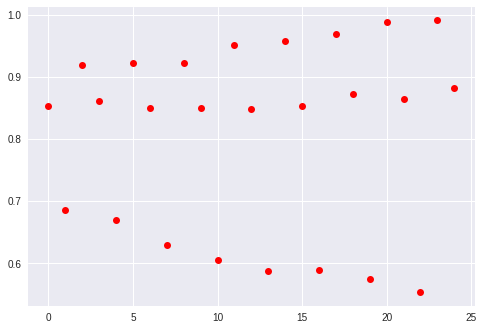

In [0]:
import matplotlib.pyplot as plt
plt.plot( act[2,:], 'ro')
#plt.plot( act[1,:], 'g+')
#plt.plot(act[2,:], 'ko')




In [0]:
print(len(weights))
print(len(weights[0]))
print(weights[0][6].shape)
model3.set_weights(weights[249])
print(np.linalg.norm(weights[0][1]))

NameError: ignored

In [0]:


import re


inp = model2.input                                           # input placeholder
outputs = [layer.output for layer in model2.layers[1:]]          # all layer outputs
pattern = re.compile(".*Relu.*")
relu = []
for x in outputs:
  if pattern.match(x.name):
    relu.append(x)
    
print(relu)
functor = [K.function([inp], [out]) for out in relu] 
layer_outs = [func([x_train]) for func in functor]


[<tf.Tensor 'dense_43/Relu:0' shape=(?, 20) dtype=float32>, <tf.Tensor 'activation_39/Relu:0' shape=(?, 20) dtype=float32>, <tf.Tensor 'activation_40/Relu:0' shape=(?, 20) dtype=float32>]


In [0]:
import matplotlib.mlab as mlab
print(len(layer_outs))
print((layer_outs[0][0].size))
idx=mlab.find(layer_outs[0][0]>0)
print(len(idx))
print(float(len(idx))/layer_outs[0][0].size)

3
360000
253937
0.705380555556


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  after removing the cwd from sys.path.


size

(?, 20)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
lambda_4 (Lambda)               (None, 28, 28, 1)    0           input_4[0][0]                    
__________________________________________________________________________________________________
flatten_4 (Flatten)             (None, 784)          0           lambda_4[0][0]                   
__________________________________________________________________________________________________
dense_64 (Dense)                (None, 20)           15700       flatten_4[0][0]                  
_______________________________________________________________________________________________

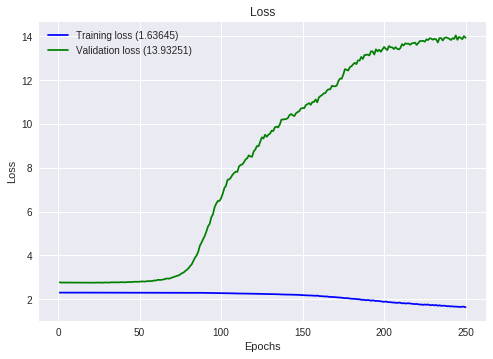

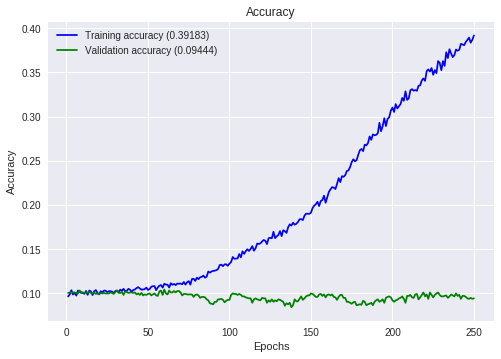

In [0]:
x_train = x_traink_90
x_test = x_testk_90
y_train = y_traink_90
y_test  = y_testk_90
import keras
from keras import *
from keras.callbacks import *
from keras.layers import *
from keras.optimizers import *
from keras.metrics import *
from keras.backend import tf as ktf
from sklearn.model_selection import train_test_split
y_train = utils.to_categorical(y_train, 10).astype(np.uint8)
y_test = utils.to_categorical(y_test, 10).astype(np.uint8)

x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28, 28,1)
import matplotlib.pyplot as plt



numChannel = 20
numClasses = 10
inputs = Input(shape = (28,28,1))
inputs1 = keras.layers.Lambda(lambda image:ktf.image.resize_images(image, 
                                                                   (28, 28)))(inputs)
f1 = Flatten()(inputs1)
conv1 = Dense(numChannel, activation = 'relu')(f1)
conv2 = residualBlock(conv1, numChannel)
conv3 = residualBlock(conv2, numChannel)
conv4 = residualBlock(conv3, numChannel)
conv5 = residualBlock(conv4, numChannel)
conv6 = residualBlock(conv5, numChannel)
conv7 = residualBlock(conv6, numChannel)
conv8 = residualBlock(conv7, numChannel)
conv9 = residualBlock(conv8, numChannel)
conv10 = residualBlock(conv9,numChannel)
conv11 = residualBlock(conv10,numChannel)
conv12 = residualBlock(conv11,numChannel)
conv13 = residualBlock(conv12,numChannel)
conv14 = residualBlock(conv13,numChannel)
conv15 = residualBlock(conv14,numChannel)
conv16 = residualBlock(conv15,numChannel)
conv17 = residualBlock(conv16,numChannel)
conv18 = residualBlock(conv17,numChannel)
conv19 = residualBlock(conv18,numChannel)
conv20 = residualBlock(conv19,numChannel)



print("size\n")
print(conv10.get_shape())
#####
outputs = Dense(10, activation = 'softmax')(conv10)



model3 = Model(inputs = [inputs], outputs = [outputs])

#saving weights

weights = []
p1 = LambdaCallback(on_epoch_end=lambda batch, logs:  weights.append(model3.get_weights() ))

filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='train_acc', verbose=1, save_best_only=False, mode='max')
callbacks_list = [checkpoint]


model3.summary()
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=False)

model3.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model3.fit(x_train, y_train,validation_data = (x_test,y_test),batch_size = 32, epochs =250, callbacks=[p1])
plot_history(history)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.


(10, 249)


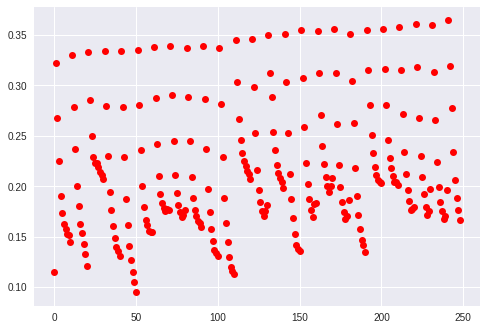

In [0]:
import re
import matplotlib.pyplot as plt
act=np.array([])
model3.set_weights(weights[0])
inp = model3.input                                           # input placeholder
outputs = [layer.output for layer in model3.layers[1:]]          # all layer outputs
pattern = re.compile(".*Relu.*")
relu = []
for x in outputs:
  if pattern.match(x.name):
    relu.append(x)    

for i in xrange(1,250,1):
  model3.set_weights(weights[i])
  inp = model3.input                                           # input placeholder
  outputs = [layer.output for layer in model3.layers[1:]]          # all layer outputs
  functor = [K.function([inp], [out]) for out in relu] 
  layer_outs = [func([x_train]) for func in functor]
  for j in xrange(0,len(layer_outs)):
    idx=mlab.find(layer_outs[j][0]>0.1*np.max(layer_outs[j][0]))
    act=np.append(act,float(len(idx))/layer_outs[j][0].size)

act=np.reshape(act,(len(layer_outs),-1))
print(act.shape)

plt.plot( act[1,:], 'ro')

0.35206088


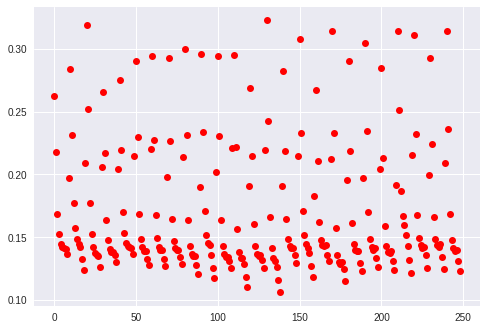

In [0]:
plt.plot( act[9,:], 'ro')
print(np.max(layer_outs[0][0]))

size

(?, 20)
Train on 18000 samples, validate on 1800 samples
Epoch 1/250
18000/18000 [==============================] - 2s 83us/step - loss: 2.3033 - acc: 0.1023 - val_loss: 2.6901 - val_acc: 0.0983
Epoch 2/250
18000/18000 [==============================] - 1s 51us/step - loss: 2.3030 - acc: 0.1004 - val_loss: 2.6812 - val_acc: 0.1033
Epoch 3/250
18000/18000 [==============================] - 1s 53us/step - loss: 2.3029 - acc: 0.1022 - val_loss: 2.6881 - val_acc: 0.0983
Epoch 4/250
18000/18000 [==============================] - 1s 52us/step - loss: 2.3033 - acc: 0.1014 - val_loss: 2.6858 - val_acc: 0.0983
Epoch 5/250
18000/18000 [==============================] - 1s 59us/step - loss: 2.3030 - acc: 0.0996 - val_loss: 2.6790 - val_acc: 0.1017
Epoch 6/250
18000/18000 [==============================] - 1s 58us/step - loss: 2.3030 - acc: 0.1050 - val_loss: 2.6783 - val_acc: 0.1022
Epoch 7/250
18000/18000 [==============================] - 1s 56us/step - loss: 2.3031 - acc: 0.1033 - val_lo

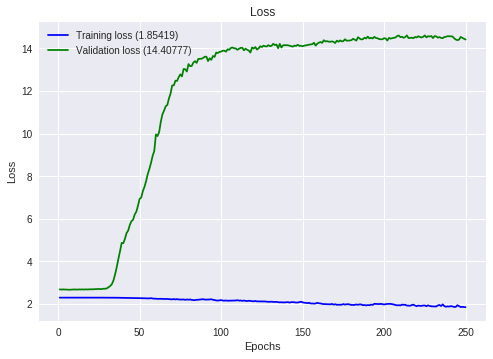

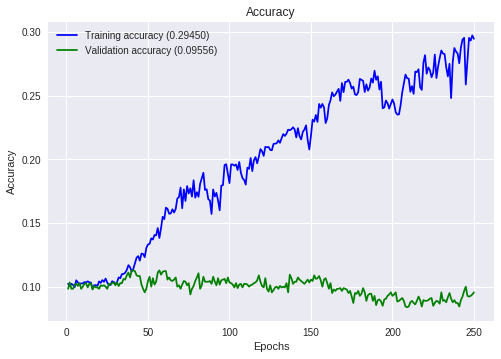

In [0]:
x_train = x_traink_90
x_test = x_testk_90
y_train = y_traink_90
y_test  = y_testk_90
import keras
from keras import *
from keras.callbacks import *
from keras.layers import *
from keras.optimizers import *
from keras.metrics import *
from keras.backend import tf as ktf
from sklearn.model_selection import train_test_split
y_train = utils.to_categorical(y_train, 10).astype(np.uint8)
y_test = utils.to_categorical(y_test, 10).astype(np.uint8)

x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28, 28,1)
import matplotlib.pyplot as plt



numChannel = 20
numClasses = 10
inputs = Input(shape = (28,28,1))
inputs1 = keras.layers.Lambda(lambda image:ktf.image.resize_images(image, 
                                                                   (28, 28)))(inputs)
f1 = Flatten()(inputs1)
conv1 = Dense(numChannel, activation = 'relu')(f1)
conv2 = residualBlock(conv1, numChannel)
conv3 = residualBlock(conv2, numChannel)
conv4 = residualBlock(conv3, numChannel)
conv5 = residualBlock(conv4, numChannel)
conv6 = residualBlock(conv5, numChannel)
conv7 = residualBlock(conv6, numChannel)
conv8 = residualBlock(conv7, numChannel)
conv9 = residualBlock(conv8, numChannel)
conv10 = residualBlock(conv9,numChannel)
conv11 = residualBlock(conv10,numChannel)
conv12 = residualBlock(conv11,numChannel)
conv13 = residualBlock(conv12,numChannel)
conv14 = residualBlock(conv13,numChannel)
conv15 = residualBlock(conv14,numChannel)
conv16 = residualBlock(conv15,numChannel)
conv17 = residualBlock(conv16,numChannel)
conv18 = residualBlock(conv17,numChannel)
conv19 = residualBlock(conv18,numChannel)
conv20 = residualBlock(conv19,numChannel)



print("size\n")
print(conv10.get_shape())
#####
outputs = Dense(10, activation = 'softmax')(conv5)


#saving weights
weights = []
p1 = LambdaCallback(on_epoch_end=lambda batch, logs:  weights.append(model2.get_weights() ))

model2 = Model(inputs = [inputs], outputs = [outputs])
#model2.summary()
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)

model2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model2.fit(x_train, y_train,validation_data = (x_test,y_test),batch_size = 32, epochs =250, callbacks = [p1])
plot_history(history)

In [0]:
def residualBlock(x, width):
    y = Dense(width,kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.01, seed=None))(x)
    t = Add()([x, y])
    z = Activation('relu')(t)
    
    return z
x_train = x_traink_90
x_test = x_testk_90
y_train = y_traink_90
y_test  = y_testk_90
import keras
from keras import *
from keras.callbacks import *
from keras.layers import *
from keras.optimizers import *
from keras.metrics import *
from keras.backend import tf as ktf
from sklearn.model_selection import train_test_split
y_train = utils.to_categorical(y_train, 10).astype(np.uint8)
y_test = utils.to_categorical(y_test, 10).astype(np.uint8)

x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28, 28,1)
import matplotlib.pyplot as plt



numChannel = 20
numClasses = 10
inputs = Input(shape = (28,28,1))
inputs1 = keras.layers.Lambda(lambda image:ktf.image.resize_images(image, 
                                                                   (28, 28)))(inputs)
f1 = Flatten()(inputs1)
conv1 = Dense(numChannel, activation = 'relu')(f1)
conv2 = residualBlock(conv1, numChannel)
conv3 = residualBlock(conv2, numChannel)
conv4 = residualBlock(conv3, numChannel)
conv5 = residualBlock(conv4, numChannel)
conv6 = residualBlock(conv5, numChannel)
conv7 = residualBlock(conv6, numChannel)
conv8 = residualBlock(conv7, numChannel)
conv9 = residualBlock(conv8, numChannel)
conv10 = residualBlock(conv9,numChannel)
conv11 = residualBlock(conv10,numChannel)
conv12 = residualBlock(conv11,numChannel)
conv13 = residualBlock(conv12,numChannel)
conv14 = residualBlock(conv13,numChannel)
conv15 = residualBlock(conv14,numChannel)
conv16 = residualBlock(conv15,numChannel)
conv17 = residualBlock(conv16,numChannel)
conv18 = residualBlock(conv17,numChannel)
conv19 = residualBlock(conv18,numChannel)
conv20 = residualBlock(conv19,numChannel)
conv21 = residualBlock(conv20,numChannel)
conv22 = residualBlock(conv21,numChannel)
conv23 = residualBlock(conv22,numChannel)
conv24 = residualBlock(conv23,numChannel)
conv25 = residualBlock(conv24,numChannel)
conv26 = residualBlock(conv25,numChannel)
conv27 = residualBlock(conv26,numChannel)
conv28 = residualBlock(conv27,numChannel)
conv29 = residualBlock(conv28,numChannel)
conv30 = residualBlock(conv29,numChannel)



print("size\n")
print(conv10.get_shape())
#####
outputs = Dense(10, activation = 'softmax')(conv7)


#saving weights
weights = []
p1 = LambdaCallback(on_epoch_end=lambda batch, logs:  weights.append(model2.get_weights() ))

model2 = Model(inputs = [inputs], outputs = [outputs])
#model2.summary()
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=False)

model2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model2.fit(x_train, y_train,validation_data = (x_test,y_test),batch_size = 32, epochs =250, callbacks = [p1])
plot_history(history)

In [0]:
print((weights[0]))

size

(?, 20)
Train on 18000 samples, validate on 1800 samples
Epoch 1/100
18000/18000 [==============================] - 4s 195us/step - loss: 2.3029 - acc: 0.1026 - val_loss: 2.7783 - val_acc: 0.1067
Epoch 2/100
18000/18000 [==============================] - 2s 84us/step - loss: 2.3024 - acc: 0.1033 - val_loss: 2.7798 - val_acc: 0.1083
Epoch 3/100
18000/18000 [==============================] - 2s 84us/step - loss: 2.3024 - acc: 0.1024 - val_loss: 2.7698 - val_acc: 0.1061
Epoch 4/100
18000/18000 [==============================] - 2s 85us/step - loss: 2.3022 - acc: 0.1037 - val_loss: 2.7722 - val_acc: 0.1083
Epoch 5/100
18000/18000 [==============================] - 2s 84us/step - loss: 2.3023 - acc: 0.1043 - val_loss: 2.7711 - val_acc: 0.1089
Epoch 6/100
18000/18000 [==============================] - 1s 83us/step - loss: 2.3023 - acc: 0.1046 - val_loss: 2.7701 - val_acc: 0.1078
Epoch 7/100
18000/18000 [==============================] - 2s 85us/step - loss: 2.3023 - acc: 0.1047 - val_l

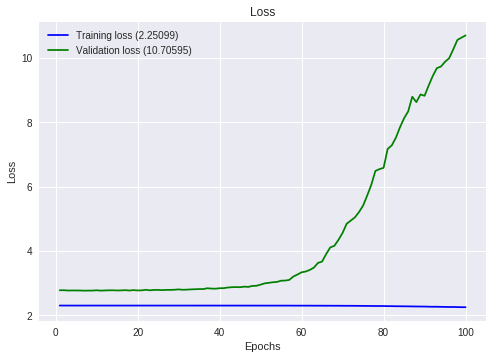

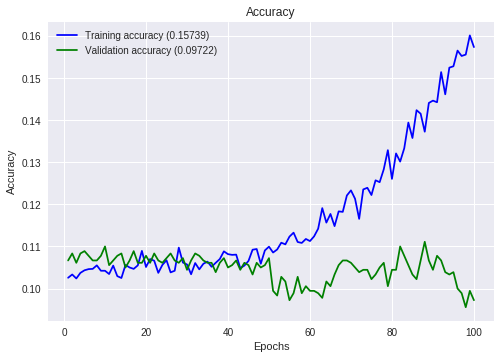

In [0]:
x_train = x_traink_90
x_test = x_testk_90
y_train = y_traink_90
y_test  = y_testk_90
import keras
from keras import *
from keras.callbacks import *
from keras.layers import *
from keras.optimizers import *
from keras.metrics import *
from keras.backend import tf as ktf
from sklearn.model_selection import train_test_split
y_train = utils.to_categorical(y_train, 10).astype(np.uint8)
y_test = utils.to_categorical(y_test, 10).astype(np.uint8)

x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28, 28,1)
import matplotlib.pyplot as plt



numChannel = 20
numClasses = 10
inputs = Input(shape = (28,28,1))
inputs1 = keras.layers.Lambda(lambda image:ktf.image.resize_images(image, 
                                                                   (28, 28)))(inputs)
f1 = Flatten()(inputs1)
conv1 = Dense(numChannel, activation = 'relu')(f1)
conv2 = residualBlock(conv1, numChannel)
conv3 = residualBlock(conv2, numChannel)
conv4 = residualBlock(conv3, numChannel)
conv5 = residualBlock(conv4, numChannel)
conv6 = residualBlock(conv5, numChannel)
conv7 = residualBlock(conv6, numChannel)
conv8 = residualBlock(conv7, numChannel)
conv9 = residualBlock(conv8, numChannel)
conv10 = residualBlock(conv9,numChannel)
conv11 = residualBlock(conv10,numChannel)
conv12 = residualBlock(conv11,numChannel)
conv13 = residualBlock(conv12,numChannel)
conv14 = residualBlock(conv13,numChannel)
conv15 = residualBlock(conv14,numChannel)
conv16 = residualBlock(conv15,numChannel)
conv17 = residualBlock(conv16,numChannel)
conv18 = residualBlock(conv17,numChannel)
conv19 = residualBlock(conv18,numChannel)
conv20 = residualBlock(conv19,numChannel)
conv21 = residualBlock(conv20,numChannel)
conv22 = residualBlock(conv21,numChannel)
conv23 = residualBlock(conv22,numChannel)
conv24 = residualBlock(conv23,numChannel)
conv25 = residualBlock(conv24,numChannel)
conv26 = residualBlock(conv25,numChannel)
conv27 = residualBlock(conv26,numChannel)
conv28 = residualBlock(conv27,numChannel)
conv29 = residualBlock(conv28,numChannel)
conv30 = residualBlock(conv29,numChannel)
conv31 = residualBlock(conv30,numChannel)
conv32 = residualBlock(conv31,numChannel)
conv33 = residualBlock(conv32,numChannel)
conv34 = residualBlock(conv33,numChannel)
conv35 = residualBlock(conv34,numChannel)
conv36 = residualBlock(conv35,numChannel)
conv37 = residualBlock(conv36,numChannel)
conv38 = residualBlock(conv37,numChannel)
conv39 = residualBlock(conv38,numChannel)
conv40 = residualBlock(conv39,numChannel)
conv41 = residualBlock(conv40,numChannel)
conv42 = residualBlock(conv41,numChannel)
conv43 = residualBlock(conv42,numChannel)
conv44 = residualBlock(conv43,numChannel)
conv45 = residualBlock(conv44,numChannel)
conv46 = residualBlock(conv45,numChannel)
conv47 = residualBlock(conv46,numChannel)
conv48 = residualBlock(conv47,numChannel)
conv49 = residualBlock(conv48,numChannel)
conv50 = residualBlock(conv49,numChannel)                       
                       



print("size\n")
print(conv10.get_shape())
#####
outputs = Dense(10, activation = 'softmax')(conv20)


#saving weights
weights = []
p1 = LambdaCallback(on_epoch_end=lambda batch, logs:  weights.append(model2.get_weights() ))

model2 = Model(inputs = [inputs], outputs = [outputs])
#model2.summary()
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=False)

model2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model2.fit(x_train, y_train,validation_data = (x_test,y_test),batch_size = 32, epochs =100, callbacks = [p1])
plot_history(history)

Loading MNIST dataset

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, MaxPooling2D
from keras.layers.convolutional import Conv2D 
from keras.utils import np_utils
from keras import backend as K

from distutils.version import LooseVersion as LV
from keras import __version__

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist, fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
nb_classes = 10

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot encoding:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

print()
print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Y_train:', Y_train.shape)

()
('MNIST data loaded: train:', 60000, 'test:', 10000)
('X_train:', (60000, 28, 28))
('y_train:', (60000,))
('Y_train:', (60000, 10))


Testing out whether shallow is better than deep in MNIST

In [0]:
x_train = X_train
x_test = X_test
y_train = Y_train
y_test  = Y_test


x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28, 28,1)
import matplotlib.pyplot as plt



numChannel = 4
numClasses = 10
inputs = Input(shape = (28,28,1))
inputs1 = keras.layers.Lambda(lambda image:ktf.image.resize_images(image, 
                                                                   (28, 28)))(inputs)
f1 = Flatten()(inputs1)
conv1 = Dense(numChannel, activation = 'relu')(f1)
conv2 = residualBlock(conv1, numChannel)
conv3 = residualBlock(conv2, numChannel)
conv4 = residualBlock(conv3, numChannel)
conv5 = residualBlock(conv4, numChannel)
conv6 = residualBlock(conv5, numChannel)
conv7 = residualBlock(conv6, numChannel)
conv8 = residualBlock(conv7, numChannel)
conv9 = residualBlock(conv8, numChannel)
conv10 = residualBlock(conv9,numChannel)
conv11 = residualBlock(conv10,numChannel)
conv12 = residualBlock(conv11,numChannel)
conv13 = residualBlock(conv12,numChannel)
conv14 = residualBlock(conv13,numChannel)
conv15 = residualBlock(conv14,numChannel)

print("size\n")
print(conv10.get_shape())
#####
outputs = Dense(10, activation = 'softmax')(conv10)


#saving weights
weights = []
p1 = LambdaCallback(on_epoch_end=lambda batch, logs:  weights.append(model2.get_weights() ))

model2 = Model(inputs = [inputs], outputs = [outputs])
#model2.summary()
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)

model2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model2.fit(x_train, y_train,validation_data = (x_test,y_test),batch_size = 32, epochs =10, callbacks = [p1])
plot_history(history)

NameError: ignored

size

(?, 1)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 189us/step - loss: 1.8395 - acc: 0.2356 - val_loss: 1.7785 - val_acc: 0.2510
Epoch 2/10
60000/60000 [==============================] - 4s 67us/step - loss: 1.7455 - acc: 0.2788 - val_loss: 1.7521 - val_acc: 0.2981
Epoch 3/10
60000/60000 [==============================] - 4s 67us/step - loss: 1.7219 - acc: 0.2910 - val_loss: 1.7408 - val_acc: 0.2816
Epoch 4/10
60000/60000 [==============================] - 4s 67us/step - loss: 1.7048 - acc: 0.3001 - val_loss: 1.7057 - val_acc: 0.3108
Epoch 5/10
60000/60000 [==============================] - 4s 68us/step - loss: 1.6581 - acc: 0.3241 - val_loss: 1.6447 - val_acc: 0.3421
Epoch 6/10
60000/60000 [==============================] - 4s 67us/step - loss: 1.6016 - acc: 0.3677 - val_loss: 1.5902 - val_acc: 0.3518
Epoch 7/10
60000/60000 [==============================] - 4s 68us/step - loss: 1.5748 - acc: 0.3601 - val_loss: 1

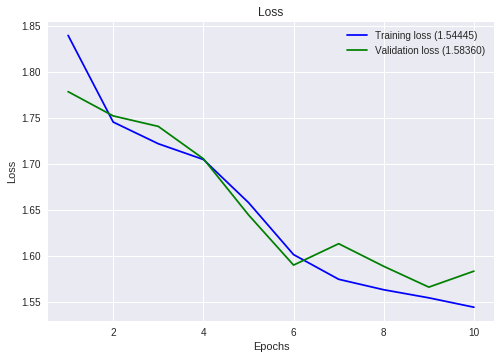

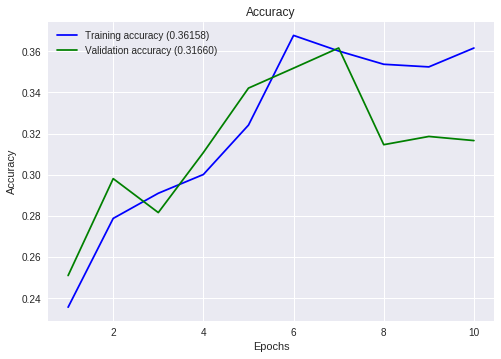

In [0]:
x_train = X_train
x_test = X_test
y_train = Y_train
y_test  = Y_test


x_train = x_train.reshape(-1, 28,28,1)
x_test = x_test.reshape(-1, 28, 28,1)
import matplotlib.pyplot as plt



numChannel = 4
numClasses = 10
inputs = Input(shape = (28,28,1))
inputs1 = keras.layers.Lambda(lambda image:ktf.image.resize_images(image, 
                                                                   (28, 28)))(inputs)
f1 = Flatten()(inputs1)
conv1 = Dense(numChannel, activation = 'relu')(f1)
conv2 = residualBlock(conv1, numChannel)
conv3 = residualBlock(conv2, numChannel)
conv4 = residualBlock(conv3, numChannel)
conv5 = residualBlock(conv4, numChannel)
conv6 = residualBlock(conv5, numChannel)
conv7 = residualBlock(conv6, numChannel)
conv8 = residualBlock(conv7, numChannel)
conv9 = residualBlock(conv8, numChannel)
conv10 = residualBlock(conv9,numChannel)
conv11 = residualBlock(conv10,numChannel)
conv12 = residualBlock(conv11,numChannel)
conv13 = residualBlock(conv12,numChannel)
conv14 = residualBlock(conv13,numChannel)
conv15 = residualBlock(conv14,numChannel)

print("size\n")
print(conv10.get_shape())
#####
outputs = Dense(10, activation = 'softmax')(conv3)


#saving weights
weights = []
p1 = LambdaCallback(on_epoch_end=lambda batch, logs:  weights.append(model2.get_weights() ))

model2 = Model(inputs = [inputs], outputs = [outputs])
#model2.summary()
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)

model2.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model2.fit(x_train, y_train,validation_data = (x_test,y_test),batch_size = 64, epochs =10, callbacks = [p1])
plot_history(history)